In [416]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
df = pd.read_csv("usd_rupiah_transaction.csv")
df

,Kurs Jual,Kurs Beli,Tanggal
0,16361.40,16198.60,4/22/2024 12:00:00 AM
1,16257.89,16096.11,4/19/2024 12:00:00 AM
2,16321.20,16158.80,4/18/2024 12:00:00 AM
3,16256.88,16095.12,4/17/2024 12:00:00 AM
4,15952.36,15793.64,4/16/2024 12:00:00 AM
...,...,...,...
1053,14003.67,13864.33,01/08/2020 00:00
1054,13988.60,13849.41,01/07/2020 00:00
1055,14030.81,13891.20,01/06/2020 00:00
1056,13968.50,13829.51,01/03/2020 00:00


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kurs Jual  1058 non-null   float64
 1   Kurs Beli  1058 non-null   float64
 2   Tanggal    1058 non-null   object 
dtypes: float64(2), object(1)
memory usage: 24.9+ KB


In [419]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df

,Kurs Jual,Kurs Beli,Tanggal
0,16361.40,16198.60,2024-04-22
1,16257.89,16096.11,2024-04-19
2,16321.20,16158.80,2024-04-18
3,16256.88,16095.12,2024-04-17
4,15952.36,15793.64,2024-04-16
...,...,...,...
1053,14003.67,13864.33,2020-01-08
1054,13988.60,13849.41,2020-01-07
1055,14030.81,13891.20,2020-01-06
1056,13968.50,13829.51,2020-01-03


In [420]:
df.dtypes

Kurs Jual           float64
Kurs Beli           float64
Tanggal      datetime64[ns]
dtype: object

In [421]:
df_bunga = pd.read_csv("suku_bunga.csv")
df_bunga.head()

,Tanggal,BI-7Day-RR
0,20 Maret 2024,6.00%
1,21 Februari 2024,6.00%
2,17 Januari 2024,6.00%
3,21 Desember 2023,6.00%
4,23/11/2023,6.00%


In [422]:
from dateutil import parser

# Fungsi untuk mengonversi tanggal dalam bahasa Indonesia
def parse_date(date_str):
    months = {
        'Januari': 'January', 'Februari': 'February', 'Maret': 'March',
        'April': 'April', 'Mei': 'May', 'Juni': 'June',
        'Juli': 'July', 'Agustus': 'August', 'September': 'September',
        'Oktober': 'October', 'November': 'November', 'Desember': 'December'
    }
    for indo, eng in months.items():
        date_str = date_str.replace(indo, eng)
    return parser.parse(date_str)

In [423]:
df_bunga['BI-7Day-RR'] = df_bunga['BI-7Day-RR'].replace({'%':''}, regex=True)
df_bunga['BI-7Day-RR'] = df_bunga['BI-7Day-RR'].astype(float)
df_bunga['Tanggal'] = df_bunga['Tanggal'].apply(parse_date)
df_bunga.dtypes

Tanggal       datetime64[ns]
BI-7Day-RR           float64
dtype: object

In [424]:
df_bunga.head()

,Tanggal,BI-7Day-RR
0,2024-03-20,6.0
1,2024-02-21,6.0
2,2024-01-17,6.0
3,2023-12-21,6.0
4,2023-11-23,6.0


In [425]:
df_saham = pd.read_csv("indeks_saham.csv")
df_saham.head()

,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
0,2020-01-01,674,164351,140067,5940.05
1,2020-02-01,680,122322,131392,5452.70
2,2020-03-01,685,143293,166004,4538.93
3,2020-04-01,690,158484,143486,4716.40
4,2020-05-01,691,137187,157169,4753.61


In [426]:
df_saham.dtypes

Bulan, Tahun                    object
Jumlah Perusahaan                int64
Volume (Juta Saham)              int64
Nilai (Milyar Rp)                int64
Indeks Harga Saham Komposit    float64
dtype: object

In [427]:
df_saham['Bulan, Tahun'] = pd.to_datetime(df_saham['Bulan, Tahun'])

In [428]:
df_saham.head()

,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
0,2020-01-01,674,164351,140067,5940.05
1,2020-02-01,680,122322,131392,5452.70
2,2020-03-01,685,143293,166004,4538.93
3,2020-04-01,690,158484,143486,4716.40
4,2020-05-01,691,137187,157169,4753.61


In [429]:
# Mengisi nilai suku bunga yang hilang dengan nilai terakhir yang tersedia
df = df.sort_values('Tanggal')
df_bunga = df_bunga.sort_values('Tanggal')
df_kurs = pd.merge_asof(df, df_bunga, on='Tanggal')

In [430]:
df_kurs.isna().sum()

Kurs Jual      0
Kurs Beli      0
Tanggal        0
BI-7Day-RR    15
dtype: int64

In [431]:
df_kurs = df_kurs.set_index(['Tanggal'])
df_kurs.head()

,Kurs Jual,Kurs Beli,BI-7Day-RR
Tanggal,,,
2020-01-02,13964.48,13825.53,NaN
2020-01-03,13968.50,13829.51,NaN
2020-01-06,14030.81,13891.20,NaN
2020-01-07,13988.60,13849.41,NaN
2020-01-08,14003.67,13864.33,NaN


In [432]:
df_kurs.head(30)

,Kurs Jual,Kurs Beli,BI-7Day-RR
Tanggal,,,
2020-01-02,13964.48,13825.53,NaN
2020-01-03,13968.50,13829.51,NaN
2020-01-06,14030.81,13891.20,NaN
2020-01-07,13988.60,13849.41,NaN
2020-01-08,14003.67,13864.33,NaN
2020-01-09,13929.30,13790.70,NaN
2020-01-10,13881.06,13742.94,NaN
2020-01-13,13776.54,13639.46,NaN
2020-01-14,13722.27,13585.73,NaN


In [433]:
try:
    select = df_kurs['BI-7Day-RR'].loc['2020-01-23']
    print(select)
except KeyError as e:
    print(f"KeyError: {e}")

5.0


In [434]:
df_kurs.fillna(select, inplace=True)

In [435]:
# Mengisi nilai saham yang hilang dengan nilai terakhir yang tersedia

df_kurs.reset_index(inplace=True)  # Reset index to merge on 'tanggal'
df_kurs['bulan'] = df_kurs['Tanggal'].dt.month
df_kurs['tahun'] = df_kurs['Tanggal'].dt.year
df_saham['bulan'] = df_saham['Bulan, Tahun'].dt.month
df_saham['tahun'] = df_saham['Bulan, Tahun'].dt.year

df_saham

,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit,bulan,tahun
0,2020-01-01,674,164351,140067,5940.05,1,2020
1,2020-02-01,680,122322,131392,5452.70,2,2020
2,2020-03-01,685,143293,166004,4538.93,3,2020
3,2020-04-01,690,158484,143486,4716.40,4,2020
4,2020-05-01,691,137187,157169,4753.61,5,2020
5,2020-06-01,692,198152,189655,4905.39,6,2020
6,2020-07-01,697,206979,169543,5149.63,7,2020
7,2020-08-01,700,217089,172830,6073.87,8,2020
8,2020-09-01,709,242612,170705,4870.04,9,2020
9,2020-10-01,709,222994,161388,5128.23,10,2020


In [436]:
df_kurs = pd.merge(df_kurs, df_saham, how='left', on=['bulan', 'tahun'])

In [437]:
df_kurs.set_index('Tanggal', inplace=True)
df_kurs

,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
Tanggal,,,,,,,,,,
2020-01-02,13964.48,13825.53,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-03,13968.50,13829.51,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-06,14030.81,13891.20,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-07,13988.60,13849.41,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-08,14003.67,13864.33,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
...,...,...,...,...,...,...,...,...,...,...
2024-04-16,15952.36,15793.64,6.0,4,2024,NaT,NaN,NaN,NaN,NaN
2024-04-17,16256.88,16095.12,6.0,4,2024,NaT,NaN,NaN,NaN,NaN
2024-04-18,16321.20,16158.80,6.0,4,2024,NaT,NaN,NaN,NaN,NaN


In [438]:
df_kurs.isna().sum()

Kurs Jual                       0
Kurs Beli                       0
BI-7Day-RR                      0
bulan                           0
tahun                           0
Bulan, Tahun                   10
Jumlah Perusahaan              10
Volume (Juta Saham)            10
Nilai (Milyar Rp)              10
Indeks Harga Saham Komposit    10
dtype: int64

In [439]:
df_kurs[df_kurs.isna() == True].head(10)

,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
Tanggal,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [440]:
try:
    mask = df_kurs.loc['2020-01-23']
    print(mask)
except KeyError as e:
    print(f"KeyError: {e}")

Kurs Jual                                 13694.13
Kurs Beli                                 13557.87
BI-7Day-RR                                     5.0
bulan                                            1
tahun                                         2020
Bulan, Tahun                   2020-01-01 00:00:00
Jumlah Perusahaan                            674.0
Volume (Juta Saham)                       164351.0
Nilai (Milyar Rp)                         140067.0
Indeks Harga Saham Komposit                5940.05
Name: 2020-01-23 00:00:00, dtype: object


In [441]:
df_kurs.fillna(mask, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5244\2457536050.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_kurs.fillna(mask, inplace=True)


In [442]:
df_kurs

,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
Tanggal,,,,,,,,,,
2020-01-02,13964.48,13825.53,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-03,13968.50,13829.51,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-06,14030.81,13891.20,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-07,13988.60,13849.41,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2020-01-08,14003.67,13864.33,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
...,...,...,...,...,...,...,...,...,...,...
2024-04-16,15952.36,15793.64,6.0,4,2024,2020-01-01,674.0,164351.0,140067.0,5940.05
2024-04-17,16256.88,16095.12,6.0,4,2024,2020-01-01,674.0,164351.0,140067.0,5940.05
2024-04-18,16321.20,16158.80,6.0,4,2024,2020-01-01,674.0,164351.0,140067.0,5940.05


In [443]:
df_kurs.reset_index(inplace=True)

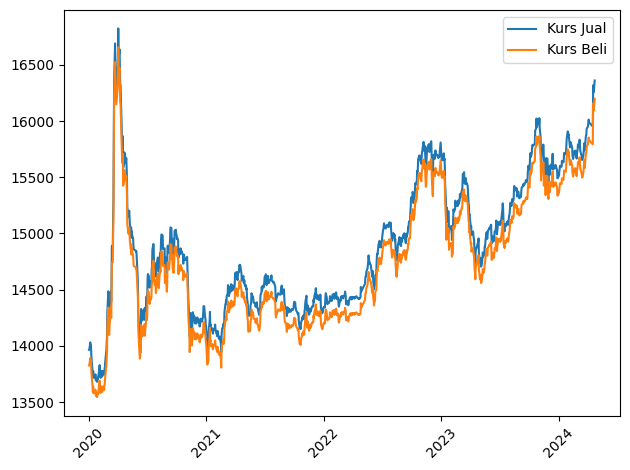

In [444]:
import matplotlib.dates as mdates

plt.plot(df_kurs['Tanggal'], df_kurs['Kurs Jual'], label = "Kurs Jual")
plt.plot(df_kurs['Tanggal'], df_kurs['Kurs Beli'], label = "Kurs Beli")
# plt.plot(df['Tanggal'], df['BI-7Day-RR'], label = "Suku Bunga")
plt.legend()

# Set major ticks format to show only the year
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show only the year

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

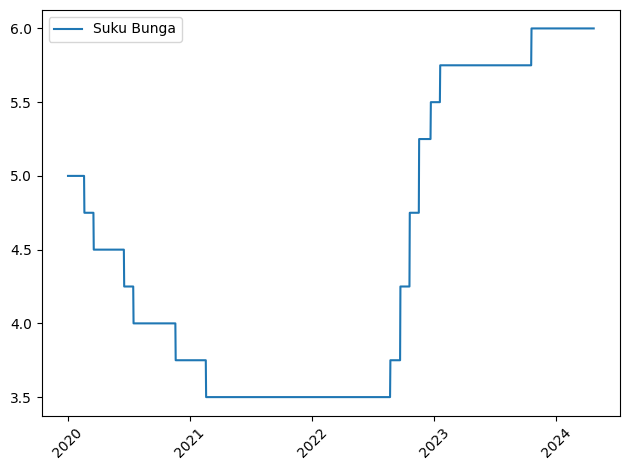

In [445]:
plt.plot(df_kurs['Tanggal'], df_kurs['BI-7Day-RR'], label = "Suku Bunga")
plt.legend()

# Set major ticks format to show only the year
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show only the year

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

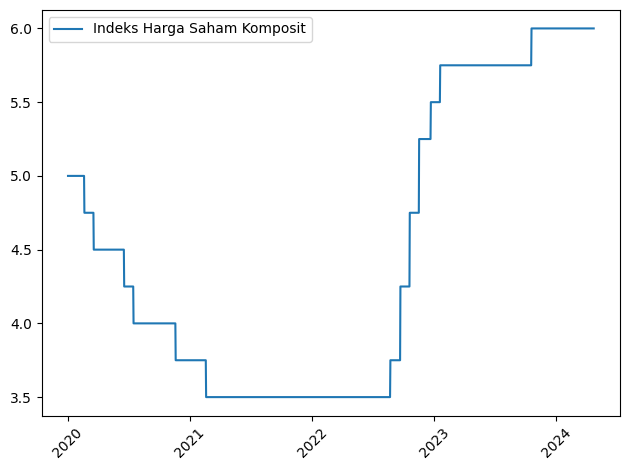

In [446]:
plt.plot(df_kurs['Tanggal'], df_kurs['BI-7Day-RR'], label = "Indeks Harga Saham Komposit")
plt.legend()

# Set major ticks format to show only the year
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks to show only the year

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

In [447]:
df_kurs_full = df_kurs.copy()

In [448]:
# Create sequences function
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

In [449]:
# Evaluate the models
def evaluate_model(model, X_test, y_test, scaler_target):
    predictions = model.predict(X_test)
    predictions = scaler_target.inverse_transform(predictions)
    y_test_actual = scaler_target.inverse_transform(y_test)
    mse = np.mean((predictions - y_test_actual)**2)
    mae = np.mean(np.abs(predictions - y_test_actual))
    return mse, mae, predictions, y_test_actual

# LSTM Sequence: per Hari

In [450]:
df_kurs = df_kurs.loc[:, ~df_kurs.columns.isin(['index', 'bulan', 'tahun', 'Bulan, Tahun', 'Tanggal'])]
df_kurs

,Kurs Jual,Kurs Beli,BI-7Day-RR,Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
0,13964.48,13825.53,5.0,674.0,164351.0,140067.0,5940.05
1,13968.50,13829.51,5.0,674.0,164351.0,140067.0,5940.05
2,14030.81,13891.20,5.0,674.0,164351.0,140067.0,5940.05
3,13988.60,13849.41,5.0,674.0,164351.0,140067.0,5940.05
4,14003.67,13864.33,5.0,674.0,164351.0,140067.0,5940.05
...,...,...,...,...,...,...,...
1053,15952.36,15793.64,6.0,674.0,164351.0,140067.0,5940.05
1054,16256.88,16095.12,6.0,674.0,164351.0,140067.0,5940.05
1055,16321.20,16158.80,6.0,674.0,164351.0,140067.0,5940.05
1056,16257.89,16096.11,6.0,674.0,164351.0,140067.0,5940.05


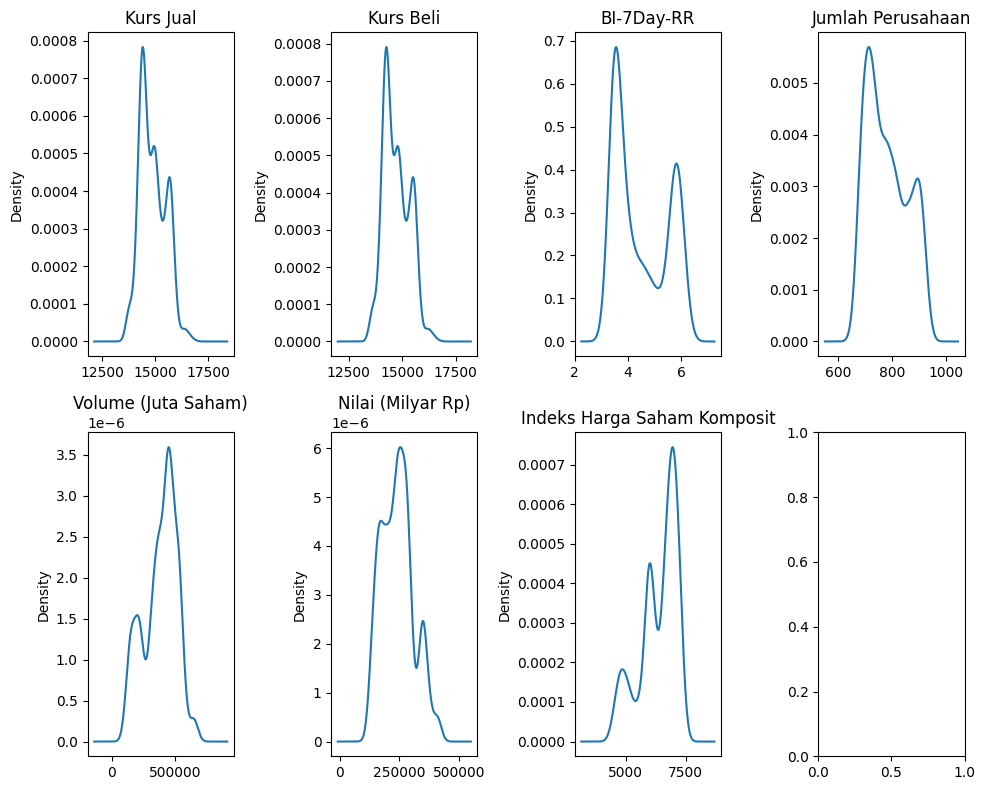

In [451]:
list_columns = list(df_kurs.columns.values)

num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,8))

for i, column_name in enumerate(list_columns):
    df_kurs[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

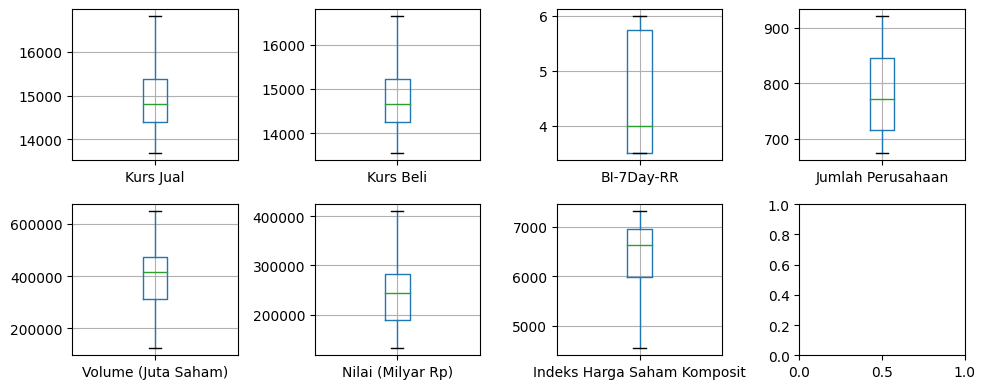

In [452]:
num_rows = 2
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,4))

for i, column_name in enumerate(list_columns):
    df_kurs.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [453]:
features = df_kurs.loc[:, ~df_kurs.columns.isin(['Kurs Jual'])]
target = df_kurs['Kurs Jual']

In [454]:
target

0       13964.48
1       13968.50
2       14030.81
3       13988.60
4       14003.67
          ...   
1053    15952.36
1054    16256.88
1055    16321.20
1056    16257.89
1057    16361.40
Name: Kurs Jual, Length: 1058, dtype: float64

In [455]:
df_kurs.shape[0]

1058

In [456]:
from sklearn.preprocessing import QuantileTransformer

# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = QuantileTransformer(n_quantiles=df_kurs.shape[0],output_distribution = 'normal')
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

In [457]:
# Daily sequences
seq_length_daily = 30  
X_monthly, y_monthly = create_sequences(scaled_features, scaled_target, seq_length_daily)

In [458]:
from sklearn.model_selection import train_test_split

X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_monthly, y_monthly, test_size=0.25)

In [459]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build and train the LSTM model
def build_and_train_model(X_train, y_train, X_test, y_test, seq_length, num_features):
    model = Sequential()
    
    # First LSTM layer with Dropout regularization
    model.add(LSTM(100, activation='relu', recurrent_activation='sigmoid', return_sequences=True, input_shape=(seq_length, num_features)))
    model.add(Dropout(0.1))  # Dropout to prevent overfitting
    
    # Second LSTM layer with Dropout regularization
    model.add(LSTM(50, activation='relu', recurrent_activation='sigmoid', return_sequences=False))
    model.add(Dropout(0.1))  # Dropout to prevent overfitting
    
    # Dense output layer
    model.add(Dense(y_train.shape[1]))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))
    
    return model, history

In [460]:
y_test_daily

array([[ 2.03722752],
       [ 0.7423097 ],
       [-0.40828387],
       [-1.34443443],
       [-0.06288499],
       [ 1.33281585],
       [-1.1981927 ],
       [-1.32421857],
       [-1.70106418],
       [ 0.43941687],
       [ 1.40864422],
       [ 0.87208889],
       [-0.77232103],
       [-0.80796507],
       [ 0.45777448],
       [ 1.8631521 ],
       [ 0.6902035 ],
       [ 0.37245334],
       [-1.58252901],
       [-1.05922224],
       [-0.92354407],
       [-0.75960136],
       [-0.75328745],
       [-0.13678402],
       [-0.11049712],
       [ 1.67157895],
       [ 0.00711443],
       [ 0.54381941],
       [-1.47220697],
       [-0.50571631],
       [ 0.31708041],
       [-1.8631521 ],
       [ 0.63409775],
       [-0.66336697],
       [-0.31708041],
       [-0.64136332],
       [-0.04982116],
       [ 0.39671187],
       [-0.7787279 ],
       [-1.52694822],
       [ 0.30587837],
       [-0.65599721],
       [-0.3421193 ],
       [ 0.25530663],
       [ 0.83959538],
       [-1

In [461]:
num_features = X_train_daily.shape[2]
num_features

6

In [462]:
model_daily, history_daily = build_and_train_model(X_train_daily, y_train_daily, X_test_daily, y_test_daily, seq_length_daily, num_features)

Epoch 1/100
39/39 [==============================] - 24s 167ms/step - loss: 0.3371 - val_loss: 0.0985
Epoch 2/100
39/39 [==============================] - 3s 85ms/step - loss: 0.1658 - val_loss: 0.0689
Epoch 3/100
39/39 [==============================] - 3s 90ms/step - loss: 0.0982 - val_loss: 0.0795
Epoch 4/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0982 - val_loss: 0.0556
Epoch 5/100
39/39 [==============================] - 4s 92ms/step - loss: 0.0841 - val_loss: 0.0492
Epoch 6/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0648 - val_loss: 0.0552
Epoch 7/100
39/39 [==============================] - 3s 70ms/step - loss: 0.0747 - val_loss: 0.0619
Epoch 8/100
39/39 [==============================] - 3s 77ms/step - loss: 0.0671 - val_loss: 0.0439
Epoch 9/100
39/39 [==============================] - 3s 76ms/step - loss: 0.0730 - val_loss: 0.0484
Epoch 10/100
39/39 [==============================] - 3s 87ms/step - loss: 0.0692 - val_loss: 0.04

In [463]:
mse_daily, mae_daily, predictions_daily, y_test_actual_daily = evaluate_model(model_daily, X_test_daily, y_test_daily, scaler)

9/9 [==============================] - 1s 21ms/step


In [464]:
print(f'Mean Squared Error (Daily): {mse_daily}')
print(f'Mean Absolute Error (Daily): {mae_daily}')

Mean Squared Error (Daily): 4377.130237753876
Mean Absolute Error (Daily): 43.79224358584631


In [465]:
print(f'Predictions Daily: {predictions_daily}')

Predictions Daily: [[15949.485 ]
 [15468.633 ]
 [14423.237 ]
 [14235.83  ]
 [14744.446 ]
 [15734.105 ]
 [14315.22  ]
 [14269.845 ]
 [14128.625 ]
 [15083.552 ]
 [15708.15  ]
 [15772.096 ]
 [14372.51  ]
 [14392.61  ]
 [15062.148 ]
 [15908.921 ]
 [15431.012 ]
 [15096.86  ]
 [14177.283 ]
 [14302.16  ]
 [14343.36  ]
 [14382.56  ]
 [14415.277 ]
 [14702.039 ]
 [14649.89  ]
 [15788.079 ]
 [14872.809 ]
 [15254.428 ]
 [14242.434 ]
 [14327.97  ]
 [14853.9   ]
 [14087.178 ]
 [15274.96  ]
 [14426.866 ]
 [14615.176 ]
 [14419.74  ]
 [14783.896 ]
 [15050.889 ]
 [14422.76  ]
 [14215.783 ]
 [14959.422 ]
 [14343.36  ]
 [14539.006 ]
 [14949.38  ]
 [15492.022 ]
 [14232.143 ]
 [16012.688 ]
 [14959.424 ]
 [14398.85  ]
 [14412.71  ]
 [15069.626 ]
 [15595.59  ]
 [15664.93  ]
 [14801.042 ]
 [14355.42  ]
 [14240.649 ]
 [14745.404 ]
 [15666.346 ]
 [15772.258 ]
 [15613.789 ]
 [14536.32  ]
 [15274.749 ]
 [14955.701 ]
 [14960.624 ]
 [15950.841 ]
 [15653.254 ]
 [15032.79  ]
 [15713.791 ]
 [14372.51  ]
 [15019.705 ]
 

In [466]:
df_result = pd.DataFrame()
df_result['Actual'] = y_test_actual_daily.flatten()
df_result['Predicted'] = predictions_daily.flatten()
df_result

,Actual,Predicted
0,16012.67,15949.485352
1,15441.83,15468.632812
2,14480.04,14423.237305
3,14200.65,14235.830078
4,14745.36,14744.446289
...,...,...
252,15781.51,15687.340820
253,15659.91,15695.080078
254,14124.27,14173.190430
255,14188.59,14203.795898


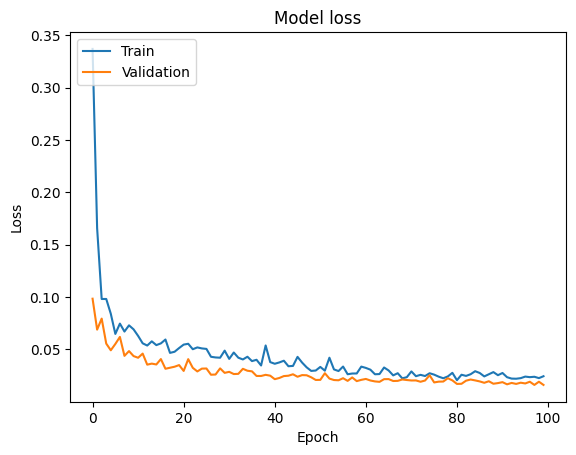

In [467]:
plt.plot(history_daily.history['loss'])
plt.plot(history_daily.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

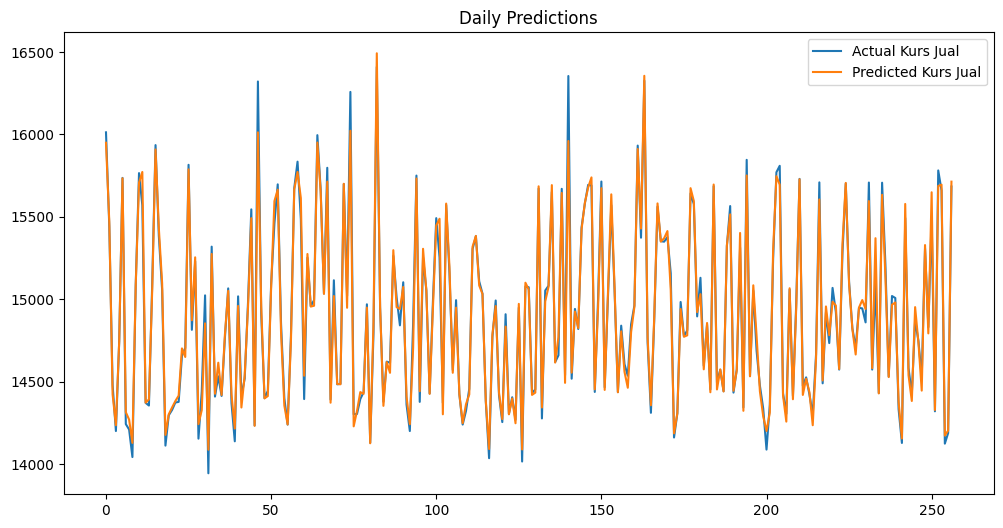

In [468]:
# Plot the results
def plot_results(predictions, actual, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual Kurs Jual')
    plt.plot(predictions, label='Predicted Kurs Jual')
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(predictions_daily, y_test_actual_daily, 'Daily Predictions')

# LSTM Sequence: per Minggu

In [469]:
df_kurs_full.head()

,Tanggal,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
0,2020-01-02,13964.48,13825.53,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
1,2020-01-03,13968.50,13829.51,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
2,2020-01-06,14030.81,13891.20,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
3,2020-01-07,13988.60,13849.41,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05
4,2020-01-08,14003.67,13864.33,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05


In [470]:
def helper(my_date_time):
    week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    week_number = my_date_time.isocalendar()[1]
    week_day = week_list[my_date_time.isocalendar()[2] - 1]
    return (week_day + str(week_number))

df_kurs_full['week_number_day'] = df_kurs_full['Tanggal'].apply(helper)

In [471]:
grouped_df = df_kurs_full.groupby("week_number_day")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df

C:\Users\Asus\AppData\Local\Temp\ipykernel_5244\3435120363.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = grouped_df.mean()


,week_number_day,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
0,Friday1,14771.090,14624.114,4.7500,1.0,2022.0,781.40,361964.40,249536.00,6496.1660
1,Friday10,14880.434,14732.370,4.7000,3.0,2022.0,792.20,347728.40,245726.60,6337.9960
2,Friday11,14990.782,14841.620,4.7000,3.0,2022.0,792.20,347728.40,245726.60,6337.9960
3,Friday12,15294.294,15142.110,4.6500,3.0,2022.0,792.20,347728.40,245726.60,6337.9960
4,Friday13,15131.785,14981.220,4.3125,3.5,2021.5,762.75,326965.50,233705.75,6142.1850
...,...,...,...,...,...,...,...,...,...,...
259,Wednesday53,14175.530,14034.480,3.7500,12.0,2020.0,713.00,523856.00,350131.00,5979.0700
260,Wednesday6,14665.766,14519.840,4.8000,2.0,2022.0,788.00,325331.00,214909.80,6548.4040
261,Wednesday7,14355.925,14213.080,4.5000,2.0,2021.5,754.75,324103.75,218201.25,6356.4775
262,Wednesday8,14674.210,14528.194,4.7500,2.0,2022.0,788.00,325331.00,214909.80,6548.4040


In [472]:
features_weekly = mean_df.loc[:, ~mean_df.columns.isin(['week_number_day', 'Kurs Jual', 'bulan', 'tahun'])]
target_weekly = mean_df['Kurs Jual']

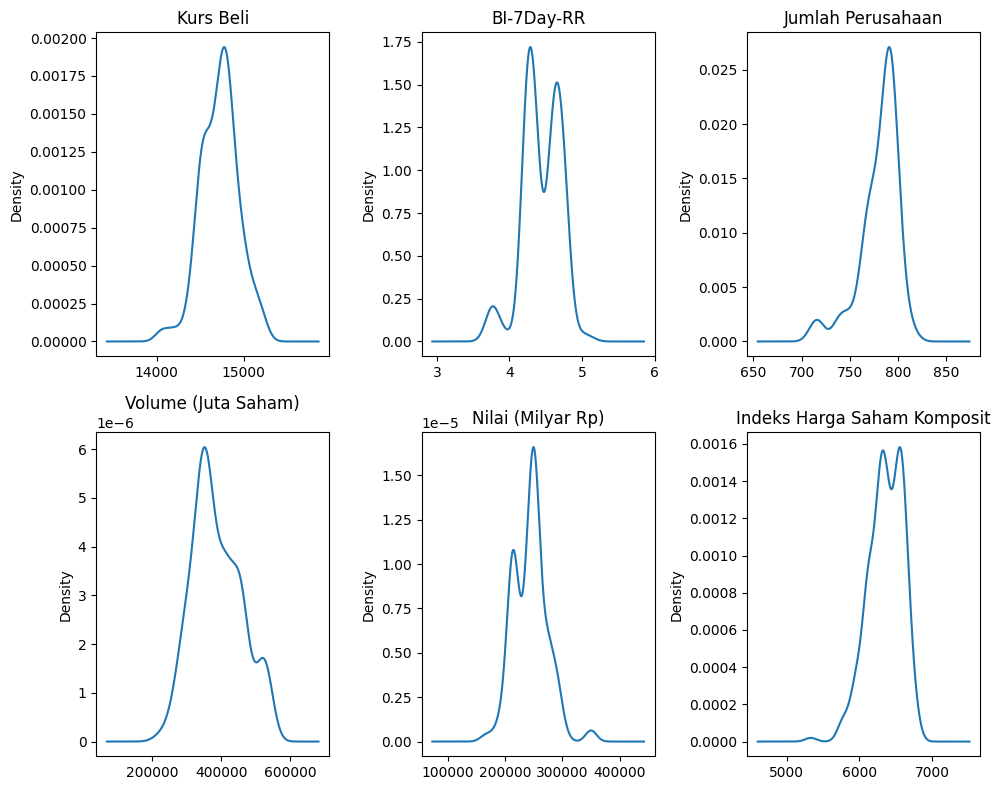

In [473]:
list_columns = list(features_weekly.columns.values)

num_rows = 2
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,8))

for i, column_name in enumerate(list_columns):
    features_weekly[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

In [474]:
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = QuantileTransformer(n_quantiles=mean_df.shape[0], output_distribution='normal')
scaled_features_weekly = scaler.fit_transform(features_weekly)
scaled_target_weekly = scaler.fit_transform(target_weekly.values.reshape(-1, 1))

In [475]:
seq_length_weekly = 4
X_weekly, y_weekly = create_sequences(scaled_features_weekly, scaled_target_weekly, seq_length_weekly)

In [476]:
from sklearn.model_selection import train_test_split

X_train_weekly, X_test_weekly, y_train_weekly, y_test_weekly = train_test_split(X_weekly, y_weekly, test_size=0.25)

In [477]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Build and train the LSTM model
def build_and_train_model_weekly(X_train, y_train, X_test, y_test, seq_length, num_features):
    model = Sequential()
    # First LSTM layer with Dropout regularization
    model.add(LSTM(100, activation='relu', recurrent_activation='sigmoid', return_sequences=True, input_shape=(seq_length, num_features)))
    model.add(Dropout(0.1))  # Dropout to prevent overfitting
    
    # Second LSTM layer with Dropout regularization
    model.add(LSTM(50, activation='relu', recurrent_activation='sigmoid', return_sequences=False))
    model.add(Dropout(0.1))  # Dropout to prevent overfitting
    
    # Dense output layer
    model.add(Dense(y_train.shape[1]))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))
    
    return model, history

In [478]:
model_weekly, history_weekly = build_and_train_model_weekly(X_train_weekly, y_train_weekly, X_test_weekly, y_test_weekly, seq_length_weekly, num_features)

Epoch 1/100
10/10 [==============================] - 6s 94ms/step - loss: 1.1967 - val_loss: 1.1564
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 1.0950 - val_loss: 1.0651
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 0.9504 - val_loss: 0.9660
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.8430 - val_loss: 0.8908
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.7682 - val_loss: 0.8737
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6871 - val_loss: 0.8227
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6698 - val_loss: 0.7838
Epoch 8/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6327 - val_loss: 0.7466
Epoch 9/100
10/10 [==============================] - 0s 19ms/step - loss: 0.5644 - val_loss: 0.7237
Epoch 10/100
10/10 [==============================] - 0s 20ms/step - loss: 0.5581 - val_loss: 0.7190

In [479]:
mse_weekly, mae_weekly, predictions_weekly, y_test_actual_weekly = evaluate_model(model_weekly, X_test_weekly, y_test_weekly, scaler)

3/3 [==============================] - 1s 58ms/step


In [480]:
print(f'Mean Squared Error (Weekly): {mse_weekly}')
print(f'Mean Absolute Error (Weekly): {mae_weekly}')

Mean Squared Error (Weekly): 22252.661053214048
Mean Absolute Error (Weekly): 103.72121334134597


In [481]:
df_result_weekly = pd.DataFrame()
df_result_weekly['Actual'] = y_test_actual_weekly.flatten()
df_result_weekly['Predicted'] = predictions_weekly.flatten()
df_result_weekly

,Actual,Predicted
0,14600.036000,14787.329102
1,14933.626667,14980.307617
2,15302.934000,15307.991211
3,14877.017500,14841.280273
4,14907.170000,14696.810547
...,...,...
60,14652.652500,14621.966797
61,14639.032000,14693.958984
62,14657.722000,14631.765625
63,14867.168000,14890.490234


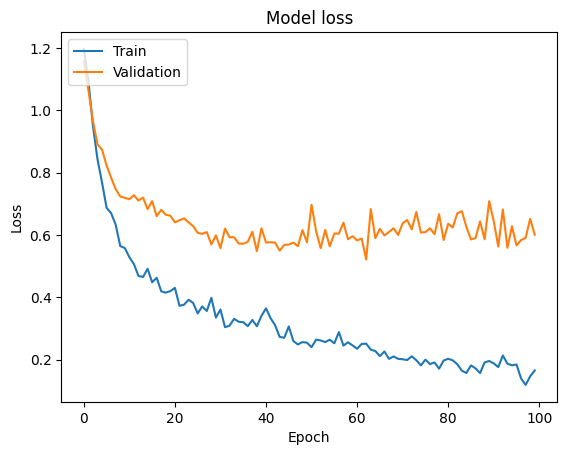

In [482]:
plt.plot(history_weekly.history['loss'])
plt.plot(history_weekly.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

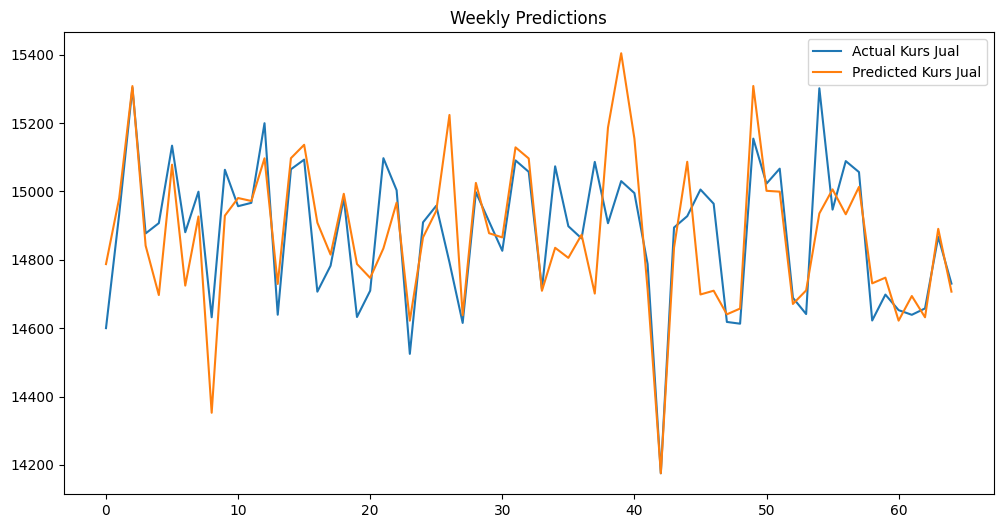

In [483]:
plot_results(predictions_weekly, y_test_actual_weekly, 'Weekly Predictions')

# LSTM Sequence: per Bulan

In [484]:
df_kurs_full.head()

,Tanggal,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,"Bulan, Tahun",Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit,week_number_day
0,2020-01-02,13964.48,13825.53,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05,Thursday1
1,2020-01-03,13968.50,13829.51,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05,Friday1
2,2020-01-06,14030.81,13891.20,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05,Monday2
3,2020-01-07,13988.60,13849.41,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05,Tuesday2
4,2020-01-08,14003.67,13864.33,5.0,1,2020,2020-01-01,674.0,164351.0,140067.0,5940.05,Wednesday2


In [485]:
df_kurs_month = df_kurs_full.groupby(pd.PeriodIndex(df_kurs_full['Tanggal'], freq="M")).mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5244\227063639.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_kurs_month = df_kurs_full.groupby(pd.PeriodIndex(df_kurs_full['Tanggal'], freq="M")).mean()


In [486]:
df_kurs_month

,Kurs Jual,Kurs Beli,BI-7Day-RR,bulan,tahun,Jumlah Perusahaan,Volume (Juta Saham),Nilai (Milyar Rp),Indeks Harga Saham Komposit
Tanggal,,,,,,,,,
2020-01,13800.889545,13663.567273,5.000000,1.0,2020.0,674.0,164351.0,140067.0,5940.05
2020-02,13845.033500,13707.272000,4.912500,2.0,2020.0,680.0,122322.0,131392.0,5452.70
2020-03,15270.546667,15118.600952,4.654762,3.0,2020.0,685.0,143293.0,166004.0,4538.93
2020-04,15946.769048,15788.094762,4.500000,4.0,2020.0,690.0,158484.0,143486.0,4716.40
2020-05,14980.721875,14831.660000,4.500000,5.0,2020.0,691.0,137187.0,157169.0,4753.61
2020-06,14266.934762,14124.975238,4.392857,6.0,2020.0,692.0,198152.0,189655.0,4905.39
2020-07,14655.323182,14509.499091,4.125000,7.0,2020.0,697.0,206979.0,169543.0,5149.63
2020-08,14798.125000,14650.880000,4.000000,8.0,2020.0,700.0,217089.0,172830.0,6073.87
2020-09,14922.196364,14773.716818,4.000000,9.0,2020.0,709.0,242612.0,170705.0,4870.04


In [487]:
features_monthly = df_kurs_month.loc[:, ~df_kurs_month.columns.isin(['Tanggal', 'Kurs Jual', 'bulan', 'tahun'])]
target_monthly = df_kurs_month['Kurs Jual']

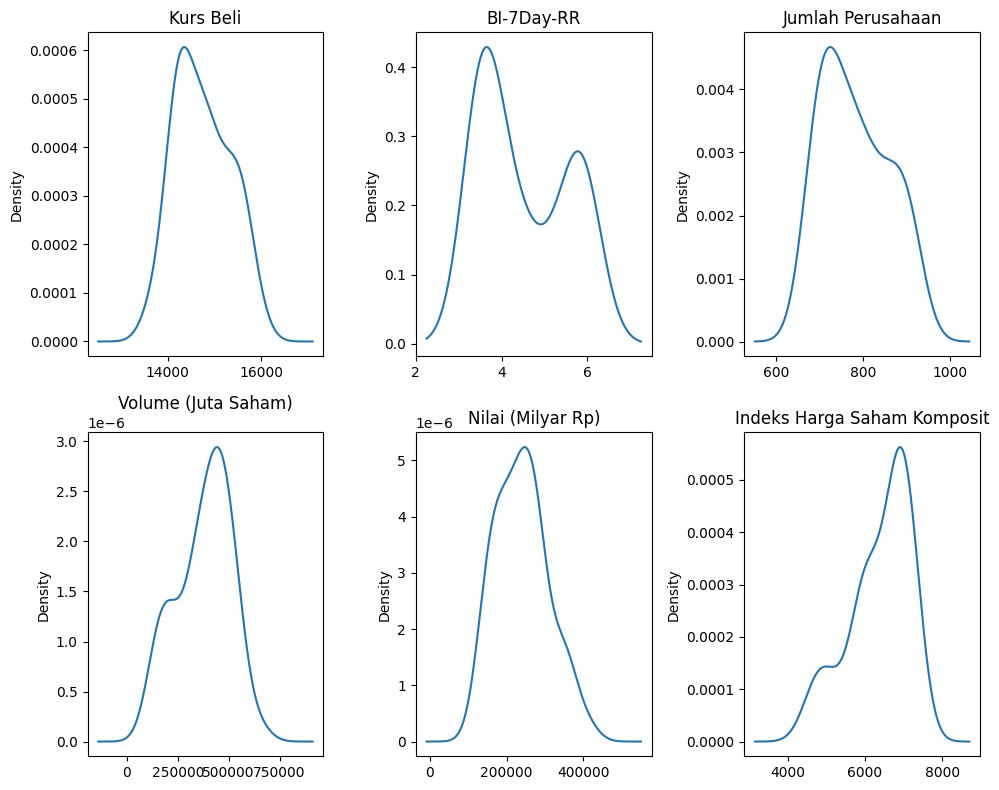

In [488]:
list_columns = list(features_monthly.columns.values)

num_rows = 2
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,8))

for i, column_name in enumerate(list_columns):
    features_monthly[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

In [489]:
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = QuantileTransformer(n_quantiles=df_kurs_month.shape[0], output_distribution='normal')
scaled_features_monthly= scaler.fit_transform(features_monthly)
scaled_target_monthly = scaler.fit_transform(target_monthly.values.reshape(-1, 1))

In [490]:
seq_length_monthly = 6
X_monthly, y_monthly = create_sequences(scaled_features_monthly, scaled_target_monthly, seq_length_monthly)

In [491]:
from sklearn.model_selection import train_test_split

X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size=0.25)

In [492]:
y_train_monthly.shape

(34, 1)

In [493]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Build and train the LSTM model
def build_and_train_model_monthly(X_train, y_train, X_test, y_test, seq_length, num_features):
    model = Sequential()
    model.add(LSTM(100, activation='sigmoid', return_sequences=True, input_shape=(seq_length, num_features)))
    model.add(LSTM(50, activation='sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test))
    return model

In [494]:
model_monthly, history_monthly = build_and_train_model(X_train_monthly, y_train_monthly, X_test_monthly, y_test_monthly, seq_length_monthly, num_features)

Epoch 1/100
2/2 [==============================] - 10s 3s/step - loss: 0.9072 - val_loss: 2.5386
Epoch 2/100
2/2 [==============================] - 0s 90ms/step - loss: 0.8194 - val_loss: 2.4024
Epoch 3/100
2/2 [==============================] - 0s 83ms/step - loss: 0.7414 - val_loss: 2.2742
Epoch 4/100
2/2 [==============================] - 0s 77ms/step - loss: 0.6665 - val_loss: 2.1608
Epoch 5/100
2/2 [==============================] - 0s 82ms/step - loss: 0.5962 - val_loss: 2.0658
Epoch 6/100
2/2 [==============================] - 0s 72ms/step - loss: 0.5336 - val_loss: 1.9992
Epoch 7/100
2/2 [==============================] - 0s 86ms/step - loss: 0.4825 - val_loss: 1.9841
Epoch 8/100
2/2 [==============================] - 0s 105ms/step - loss: 0.3829 - val_loss: 2.1088
Epoch 9/100
2/2 [==============================] - 0s 96ms/step - loss: 0.3086 - val_loss: 2.5935
Epoch 10/100
2/2 [==============================] - 0s 88ms/step - loss: 0.2405 - val_loss: 4.0471
Epoch 11/100
2/2 [=

In [495]:
mse_monthly, mae_monthly, predictions_monthly, y_test_actual_monthly = evaluate_model(model_monthly, X_test_monthly, y_test_monthly, scaler)

1/1 [==============================] - 1s 921ms/step


In [496]:
print(f'Mean Squared Error (Monthly): {mse_monthly}')
print(f'Mean Absolute Error (Monthly): {mae_monthly}')

Mean Squared Error (Monthly): 399873.0164539867
Mean Absolute Error (Monthly): 414.9403684708357


In [497]:
df_result_monthly = pd.DataFrame()
df_result_monthly['Actual'] = y_test_actual_monthly.flatten()
df_result_monthly['Predicted'] = predictions_monthly.flatten()
df_result_monthly

,Actual,Predicted
0,14822.883636,14268.771484
1,14400.560435,14407.434570
2,14655.323182,16109.344727
3,14583.748095,14407.050781
4,14798.125000,16109.344727
5,14922.196364,14265.461914
6,16109.345000,16016.424805
7,15695.497727,15530.979492
8,14762.016190,14922.831055
9,14406.916667,14417.971680


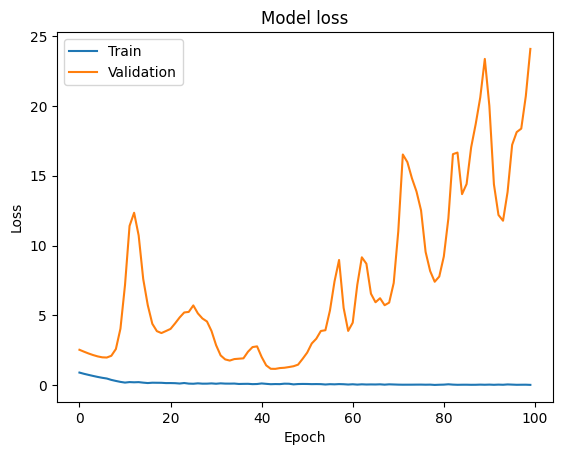

In [498]:
plt.plot(history_monthly.history['loss'])
plt.plot(history_monthly.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

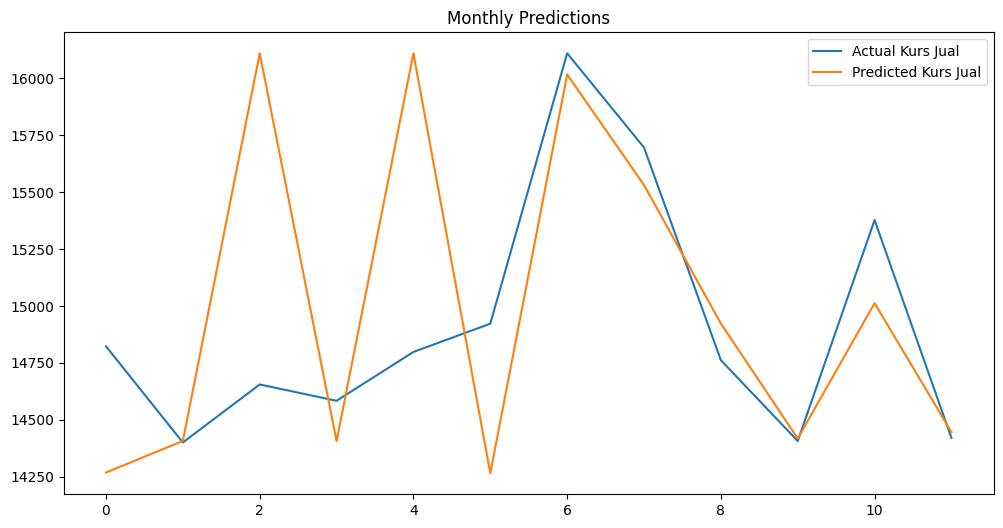

In [499]:
plot_results(predictions_monthly, y_test_actual_monthly, 'Monthly Predictions')